In [1]:
library('tidyverse')

org_opts <- options()

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


https://www.10xgenomics.com/support/software/cell-ranger/7.2/hidden/cr-5p-vdj-algorithm-inktmait

- TRAV/TRAJ:
  - TRAV1-2
  - Any of TRAJ33, TRAJ20, TRAJ12

- TRBV/TRBJ
  - TRBV20
  - TRBV6

In [2]:
mait_trav_chains <-
    c('TRAV1-2')

mait_traj_chains <-
    c('TRAJ33', 'TRAJ20', 'TRAJ12')

mait_trbv_chains <-
    c('TRBV20', 'TRBV6')

In [3]:
# https://github.com/10XGenomics/enclone/blob/cellranger5.0/enclone/src/human_iNKT_CDR3.json

mait_cdr3s <-
    jsonlite::read_json('../10X_human_MAIT_CDR3.json') %>%
    map_df(~tibble(`cdr3`=unlist(.$`cdr3`), `pubmed_id`=unlist(.$`id`)))

mait_cdr3s

cdr3,pubmed_id
<chr>,<chr>
CAVNGDDYKLSF,PMC4113934
CAVRDSDYKLSF,PMC4113934
CAVSLQDYKLSF,PMC4113934
CAVRDGDYKLSF,PMC4113934
CAVRDSNYQLIW,PMC4113934
CAVRDSNYQLIQW,PMC4113934
CAAMDSNYQLIW,PMC4113934
CAVLDSNYQLIW,PMC4113934
CARSDSNYQLIW,PMC4113934


In [4]:
mait_cdr3_scores <-
    read_tsv('MAITMATCH_results_20240501.tsv') %>%
    filter(`Score` > 0.90)

mait_cdr3_scores

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 176625 Columns: 4
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): Res, Sequence, MAIT_hit
dbl (1): Score

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Res,Sequence,MAIT_hit,Score
<chr>,<chr>,<chr>,<dbl>
Best,AVLMDSNYQLIW,CAIMDSNYQLIW,0.9557
Best,GISGSARQLTF,CAPSGSARQLTF,0.9261
Best,ILTTSGTYKYIF,CVVSSSGTYKYIF,0.9186
Best,CADRDDKIIF,CAVRRDDKIIF,0.9127
Best,CAPTGTASKLTF,CAGGTGTASKLTF,0.9067
Best,CAVGGDYKLSF,CAVSGDYKLSF,0.9607
Best,CAAGGNRLAF,CAAGGQNFVF,0.9047
Best,CAAGTGQNFVF,CAAGGQNFVF,0.9214
Best,CAAGWQNFVF,CAAGGQNFVF,0.9102


# Most recent RNA and DNA punches

In [5]:
list.files('NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448')

[1] "metadata.tsv" "README.md"    "results"

In [6]:
punches_metadata_tbl <-
    read_tsv('NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/metadata.tsv') %>%
    # "NMS22 8647 tumor" -> "tumor" 
    rename(
        `cellecta_sample_name`=`Sample Name`,
        `sample_material`=`Sample Type`,
        `description`=`Description`
    ) %>%
    mutate(
        `punch_region`=str_replace(`description`, '.*[0-9] ', ''),
        `tumor_name`=str_replace(`description`, ' [tca].*', '')
    )

punches_metadata_tbl

Rows: 28 Columns: 3
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): Sample Name, Sample Type, Description

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


cellecta_sample_name,sample_material,description,punch_region,tumor_name
<chr>,<chr>,<chr>,<chr>,<chr>
115124DN,DNA,NMS22 8647 tumor,tumor,NMS22 8647
115125DN,DNA,NMS23 471 tumor,tumor,NMS23 471
115126DN,DNA,S10-479 tumor,tumor,S10-479
115127DN,DNA,S08-25548 tumor,tumor,S08-25548
115128DN,DNA,NMS22 28934 tumor,tumor,NMS22 28934
115129DN,DNA,NMS23 471 cluster,cluster,NMS23 471
115130DN,DNA,S10-479 cluster,cluster,S10-479
115131DN,DNA,S08-25548 cluster,cluster,S08-25548
115132DN,DNA,NMS22 28934 cluster,cluster,NMS22 28934


In [7]:
list.files('NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/')

[1] "115124DN_S15.align.report.json"    "115124DN_S15.align.report.txt"    
  [3] "115124DN_S15.assemble.report.json" "115124DN_S15.assemble.report.txt" 
  [5] "115124DN_S15.clns"                 "115124DN_S15.clones_IGK.tsv"      
  [7] "115124DN_S15.clones_TRA.tsv"       "115124DN_S15.clones_TRB.tsv"      
  [9] "115124DN_S15.clones_TRD.tsv"       "115124DN_S15.clones_TRG.tsv"      
 [11] "115124DN_S15.qc.json"              "115124DN_S15.qc.txt"              
 [13] "115124DN_S15.refine.report.json"   "115124DN_S15.refine.report.txt"   
 [15] "115124RN_S1.align.report.json"     "115124RN_S1.align.report.txt"     
 [17] "115124RN_S1.assemble.report.json"  "115124RN_S1.assemble.report.txt"  
 [19] "115124RN_S1.clns"                  "115124RN_S1.clones_TRA.tsv"       
 [21] "115124RN_S1.clones_TRB.tsv"        "115124RN_S1.qc.json"              
 [23] "115124RN_S1.qc.txt"                "115124RN_S1.refine.report.json"   
 [25] "115124RN_S1.refine.report.txt"     "115125DN_S16.align.report.json"   
 [27] "115125DN_S16.align.report.txt"     "115125DN_S16.assemble.report.json"
 [29] "115125DN_S16.assemble.report.txt"  "115125DN_S16.clns"                
 [31] "115125DN_S16.clones_TRA.tsv"       "115125DN_S16.clones_TRB.tsv"      
 [33] "115125DN_S16.clones_TRD.tsv"       "115125DN_S16.clones_TRG.tsv"      
 [35] "115125DN_S16.qc.json"              "115125DN_S16.qc.txt"              
 [37] "115125DN_S16.refine.report.json"   "115125DN_S16.refine.report.txt"   
 [39] "115125RN_S2.align.report.json"     "115125RN_S2.align.report.txt"     
 [41] "115125RN_S2.assemble.report.json"  "115125RN_S2.assemble.report.txt"  
 [43] "115125RN_S2.clns"                  "115125RN_S2.clones_IGK.tsv"       
 [45] "115125RN_S2.clones_TRA.tsv"        "115125RN_S2.clones_TRB.tsv"       
 [47] "115125RN_S2.clones_TRD.tsv"        "115125RN_S2.clones_TRG.tsv"       
 [49] "115125RN_S2.qc.json"               "115125RN_S2.qc.txt"               
 [51] "115125RN_S2.refine.report.json"    "115125RN_S2.refine.report.txt"    
 [53] "115126DN_S17.align.report.json"    "115126DN_S17.align.report.txt"    
 [55] "115126DN_S17.assemble.report.json" "115126DN_S17.assemble.report.txt" 
 [57] "115126DN_S17.clns"                 "115126DN_S17.clones_TRA.tsv"      
 [59] "115126DN_S17.clones_TRB.tsv"       "115126DN_S17.clones_TRD.tsv"      
 [61] "115126DN_S17.clones_TRG.tsv"       "115126DN_S17.qc.json"             
 [63] "115126DN_S17.qc.txt"               "115126DN_S17.refine.report.json"  
 [65] "115126DN_S17.refine.report.txt"    "115126RN_S3.align.report.json"    
 [67] "115126RN_S3.align.report.txt"      "115126RN_S3.assemble.report.json" 
 [69] "115126RN_S3.assemble.report.txt"   "115126RN_S3.clns"                 
 [71] "115126RN_S3.clones_TRA.tsv"        "115126RN_S3.clones_TRB.tsv"       
 [73] "115126RN_S3.clones_TRG.tsv"        "115126RN_S3.qc.json"              
 [75] "115126RN_S3.qc.txt"                "115126RN_S3.refine.report.json"   
 [77] "115126RN_S3.refine.report.txt"     "115127DN_S18.align.report.json"   
 [79] "115127DN_S18.align.report.txt"     "115127DN_S18.assemble.report.json"
 [81] "115127DN_S18.assemble.report.txt"  "115127DN_S18.clns"                
 [83] "115127DN_S18.clones_IGK.tsv"       "115127DN_S18.clones_TRA.tsv"      
 [85] "115127DN_S18.clones_TRB.tsv"       "115127DN_S18.clones_TRG.tsv"      
 [87] "115127DN_S18.qc.json"              "115127DN_S18.qc.txt"              
 [89] "115127DN_S18.refine.report.json"   "115127DN_S18.refine.report.txt"   
 [91] "115127RN_S4.align.report.json"     "115127RN_S4.align.report.txt"     
 [93] "115127RN_S4.assemble.report.json"  "115127RN_S4.assemble.report.txt"  
 [95] "115127RN_S4.clns"                  "115127RN_S4.clones_IGK.tsv"       
 [97] "115127RN_S4.clones_TRA.tsv"        "115127RN_S4.clones_TRB.tsv"       
 [99] "115127RN_S4.clones_TRG.tsv"        "115127RN_S4.qc.json"              
[101] "115127RN_S4.qc.txt"                "115127RN_S4.refine.report.json"   
[103] "115127RN_S4.refin

In [8]:
list.files('NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/', pattern='^115124.*')

[1] "115124DN_S15.align.report.json"    "115124DN_S15.align.report.txt"    
 [3] "115124DN_S15.assemble.report.json" "115124DN_S15.assemble.report.txt" 
 [5] "115124DN_S15.clns"                 "115124DN_S15.clones_IGK.tsv"      
 [7] "115124DN_S15.clones_TRA.tsv"       "115124DN_S15.clones_TRB.tsv"      
 [9] "115124DN_S15.clones_TRD.tsv"       "115124DN_S15.clones_TRG.tsv"      
[11] "115124DN_S15.qc.json"              "115124DN_S15.qc.txt"              
[13] "115124DN_S15.refine.report.json"   "115124DN_S15.refine.report.txt"   
[15] "115124RN_S1.align.report.json"     "115124RN_S1.align.report.txt"     
[17] "115124RN_S1.assemble.report.json"  "115124RN_S1.assemble.report.txt"  
[19] "115124RN_S1.clns"                  "115124RN_S1.clones_TRA.tsv"       
[21] "115124RN_S1.clones_TRB.tsv"        "115124RN_S1.qc.json"              
[23] "115124RN_S1.qc.txt"                "115124RN_S1.refine.report.json"   
[25] "115124RN_S1.refine.report.txt"

In [9]:
punch_trb_files <-
    list.files('NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results', pattern='.clones_TRB', full.names=TRUE)

punch_trb_files

[1] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115124DN_S15.clones_TRB.tsv"
 [2] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115124RN_S1.clones_TRB.tsv" 
 [3] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115125DN_S16.clones_TRB.tsv"
 [4] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115125RN_S2.clones_TRB.tsv" 
 [5] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115126DN_S17.clones_TRB.tsv"
 [6] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115126RN_S3.clones_TRB.tsv" 
 [7] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115127DN_S18.clones_TRB.tsv"
 [8] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115127RN_S4.clones_TRB.tsv" 
 [9] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115128DN_S19.clones_TRB.tsv"
[10] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115128RN_S5.clones_TRB.tsv" 
[11] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115129DN_S20.clones_TRB.tsv"
[12] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115129RN_S6.clones_TRB.tsv" 
[13] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115130DN_S21.clones_TRB.tsv"
[14] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115130RN_S7.clones_TRB.tsv" 
[15] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115131DN_S22.clones_TRB.tsv"
[16] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115131RN_S8.clones_TRB.tsv" 
[17] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115132DN_S23.clones_TRB.tsv"
[18] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115132RN_S9.clones_TRB.tsv" 
[19] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115133DN_S24.clones_TRB.tsv"
[20] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115133RN_S10.clones_TRB.tsv"
[21] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115134DN_S25.clones_TRB.tsv"
[22] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115134RN_S11.clones_TRB.tsv"
[23] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115135DN_S26.clones_TRB.tsv"
[24] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115135RN_S12.clones_TRB.tsv"
[25] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115136DN_S27.clones_TRB.tsv"
[26] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115136RN_S13.clones_TRB.tsv"
[27] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115137DN_S28.clones_TRB.tsv"
[28] "NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115137RN_S14.clones_TRB.tsv"

In [10]:
punch_trb_files_tbl <-
    tibble(`file_path`=punch_trb_files) %>%
    mutate(
        `file_name`=str_replace_all(`file_path`, '.*/', ''),
        `cellecta_sample_name`=str_replace_all(`file_name`, '_.*', '')
    )

punch_trb_files_tbl

file_path,file_name,cellecta_sample_name
<chr>,<chr>,<chr>
NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115124DN_S15.clones_TRB.tsv,115124DN_S15.clones_TRB.tsv,115124DN
NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115124RN_S1.clones_TRB.tsv,115124RN_S1.clones_TRB.tsv,115124RN
NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115125DN_S16.clones_TRB.tsv,115125DN_S16.clones_TRB.tsv,115125DN
NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115125RN_S2.clones_TRB.tsv,115125RN_S2.clones_TRB.tsv,115125RN
NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115126DN_S17.clones_TRB.tsv,115126DN_S17.clones_TRB.tsv,115126DN
NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115126RN_S3.clones_TRB.tsv,115126RN_S3.clones_TRB.tsv,115126RN
NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115127DN_S18.clones_TRB.tsv,115127DN_S18.clones_TRB.tsv,115127DN
NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115127RN_S4.clones_TRB.tsv,115127RN_S4.clones_TRB.tsv,115127RN
NWU_240315_NS500154_1728_AHK2FVBGXV_FC346_101448/results/115128DN_S19.clones_TRB.tsv,115128DN_S19.clones_TRB.tsv,115128DN


In [17]:
punch_trb_combined_tbl <-
    punch_trb_files_tbl %>%
    pull(`file_path`) %>%
    map_df(function(one_file_path) {
        read_tsv(one_file_path, show_col_types=FALSE) %>%
            mutate(`file_path`=one_file_path)
    }) %>%
    left_join(punch_trb_files_tbl, by='file_path') %>%
    select(-`file_path`, `file_name`) %>%
    relocate(`cellecta_sample_name`) %>%
    left_join(punches_metadata_tbl, by='cellecta_sample_name') %>%
    mutate(`is_MAIT`=`aaSeqCDR3` %in% mait_cdr3_scores$`Sequence`)

punch_trb_combined_tbl %>%
    head()

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat)”


cellecta_sample_name,cloneId,readCount,readFraction,uniqueMoleculeCount,uniqueMoleculeFraction,targetSequences,targetQualities,allVHitsWithScore,allDHitsWithScore,⋯,nSeqCDR3,minQualCDR3,aaSeqCDR3,refPoints,file_name,sample_material,description,punch_region,tumor_name,is_MAIT
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
115124DN,5,250846,0.09741899,3,0.06250000,TGCAGTGCTAGAGATGAGGGCTATCCAGCACAGATACGCAGTATTTT,[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[,TRBV20-1*00(838.4),TRBD2*00(30),⋯,TGCAGTGCTAGAGATGAGGGCTATCCAGCACAGATACGCAGTATTTT,58,CSARDEGY_STDTQYF,:::::::::0:1:15:15:-11:1:21:26:0:47:::,115124DN_S15.clones_TRB.tsv,DNA,NMS22 8647 tumor,tumor,NMS22 8647,FALSE
115124DN,12,221446,0.08600115,2,0.04166667,TGTGCCAGCAGCTTCGGGACAGGGGGGAGTGAGCAGTACTTC,[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[,TRBV11-2*00(660),TRBD1*00(60),⋯,TGTGCCAGCAGCTTCGGGACAGGGGGGAGTGAGCAGTACTTC,58,CASSFGTGGSEQYF,:::::::::0:-3:14:14:1:-1:26:30:-7:42:::,115124DN_S15.clones_TRB.tsv,DNA,NMS22 8647 tumor,tumor,NMS22 8647,FALSE
115124DN,56,194590,0.07557131,1,0.02083333,TGTGCCAGCAGTTAAGGTTTGGGCAGCTAACTATGGCTACACCTTC,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRBV6-6*00(724.4),NA,⋯,TGTGCCAGCAGTTAAGGTTTGGGCAGCTAACTATGGCTACACCTTC,45,CASS*GLG_ANYGYTF,:::::::::0:-3:14:::::24:2:46:::,115124DN_S15.clones_TRB.tsv,DNA,NMS22 8647 tumor,tumor,NMS22 8647,FALSE
115124DN,10,173367,0.06732911,2,0.04166667,TGTGCCAGCAGTCGAAGGGGGGGTTGGAATGAAAAACTGTTTTTT,[[[[[[[[[[[[[[[W[[[[[[[[[[[[[[[[[[[[[[[[[[[[[,TRBV27*00(599),TRBD1*00(30),⋯,TGTGCCAGCAGTCGAAGGGGGGGTTGGAATGAAAAACTGTTTTTT,54,CASSRRGGWNEKLFF,:::::::::0:-5:12:15:-5:-1:21:27:-5:45:::,115124DN_S15.clones_TRB.tsv,DNA,NMS22 8647 tumor,tumor,NMS22 8647,FALSE
115124DN,0,171078,0.06644015,4,0.08333333,TGTGCCAGCAGCGTAGGGGTGGGCAGGGAAGCCTACGAGCAGTACTTC,[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[,TRBV7-2*00(790.9),"TRBD1*00(28),TRBD2*00(26)",⋯,TGTGCCAGCAGCGTAGGGGTGGGCAGGGAAGCCTACGAGCAGTACTTC,58,CASSVGVGREAYEQYF,:::::::::0:-1:16:20:0:-3:28:31:-2:48:::,115124DN_S15.clones_TRB.tsv,DNA,NMS22 8647 tumor,tumor,NMS22 8647,FALSE
115124DN,4,170242,0.06611548,3,0.06250000,TGCAGTGCTAGACTAGCGGGGGGCCAAGAGACCCAGTACTTC,[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[,TRBV20-1*00(807.8),TRBD2*00(43),⋯,TGCAGTGCTAGACTAGCGGGGGGCCAAGAGACCCAGTACTTC,58,CSARLAGGQETQYF,:::::::::0:-2:12:12:-4:0:23:23:-1:42:::,115124DN_S15.clones_TRB.tsv,DNA,NMS22 8647 tumor,tumor,NMS22 8647,FALSE


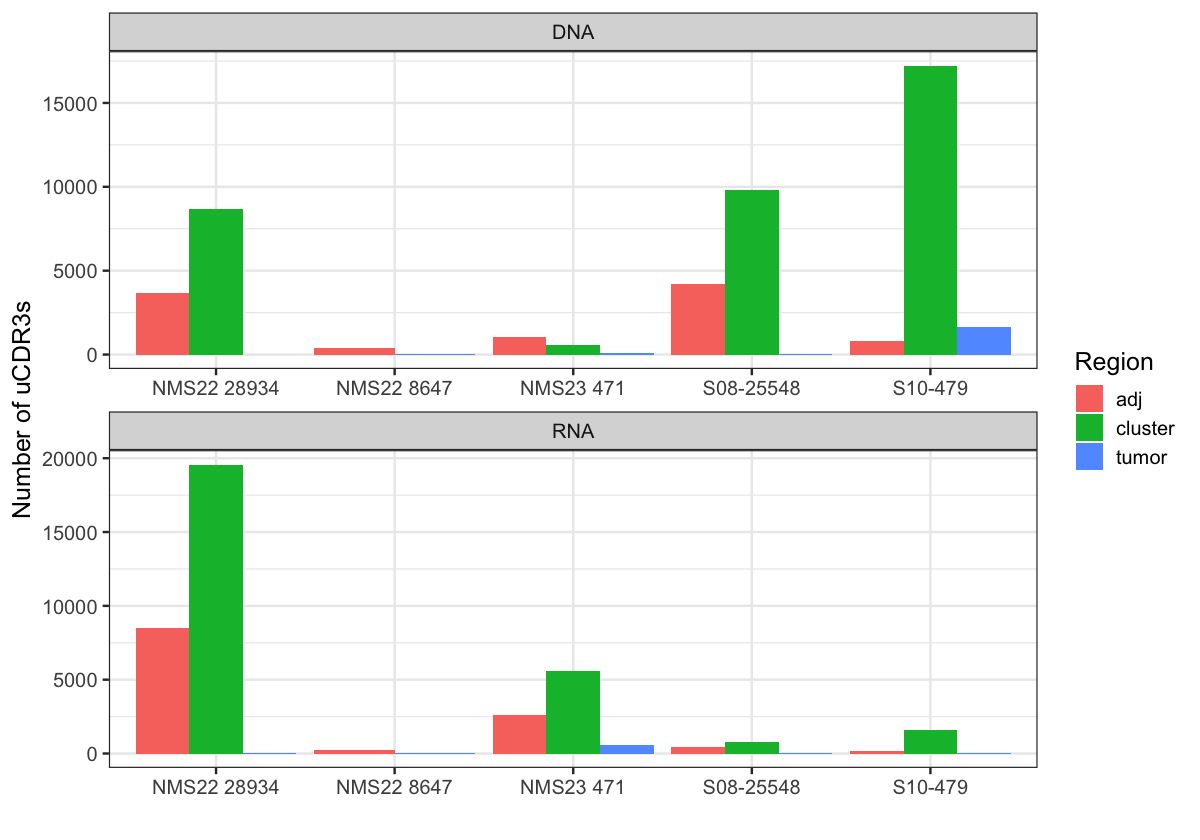

In [18]:
options(repr.plot.width=10, repr.plot.heigh=10)

punch_trb_combined_tbl %>%
    count(`tumor_name`, `sample_material`, `punch_region`) %>%
    ggplot(aes(x=`tumor_name`, y=`n`, fill=`punch_region`)) +
        geom_col(position='dodge') +
        facet_wrap(~`sample_material`, ncol=1, scales='free') +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Number of uCDR3s',
            fill='Region'
        )

options(org_opts)

In [19]:
punch_trb_combined_tbl %>%
    filter(`is_MAIT`)

cellecta_sample_name,cloneId,readCount,readFraction,uniqueMoleculeCount,uniqueMoleculeFraction,targetSequences,targetQualities,allVHitsWithScore,allDHitsWithScore,⋯,nSeqCDR3,minQualCDR3,aaSeqCDR3,refPoints,file_name,sample_material,description,punch_region,tumor_name,is_MAIT
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
115131RN,800,3014,8.895059e-04,1,1.086957e-03,TGTGCCATCTCTGACAGCTCCTACGAGCAGTACTTC,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRBV10-3*00(508.1),NA,⋯,TGTGCCATCTCTGACAGCTCCTACGAGCAGTACTTC,45,CAISDSSYEQYF,:::::::::0:-8:9:::::15:2:36:::,115131RN_S8.clones_TRB.tsv,RNA,S08-25548 cluster,cluster,S08-25548,TRUE
115132RN,40293,43,1.220084e-05,1,2.586185e-05,TGCAGCGTGGGGGAGAACACCGGGGAGCTGTTTTTT,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRBV29-1*00(459.3),TRBD1*00(25),⋯,TGCAGCGTGGGGGAGAACACCGGGGAGCTGTTTTTT,45,CSVGENTGELFF,:::::::::0:-6:8:8:-6:-1:13:14:-1:36:::,115132RN_S9.clones_TRB.tsv,RNA,NMS22 28934 cluster,cluster,NMS22 28934,TRUE


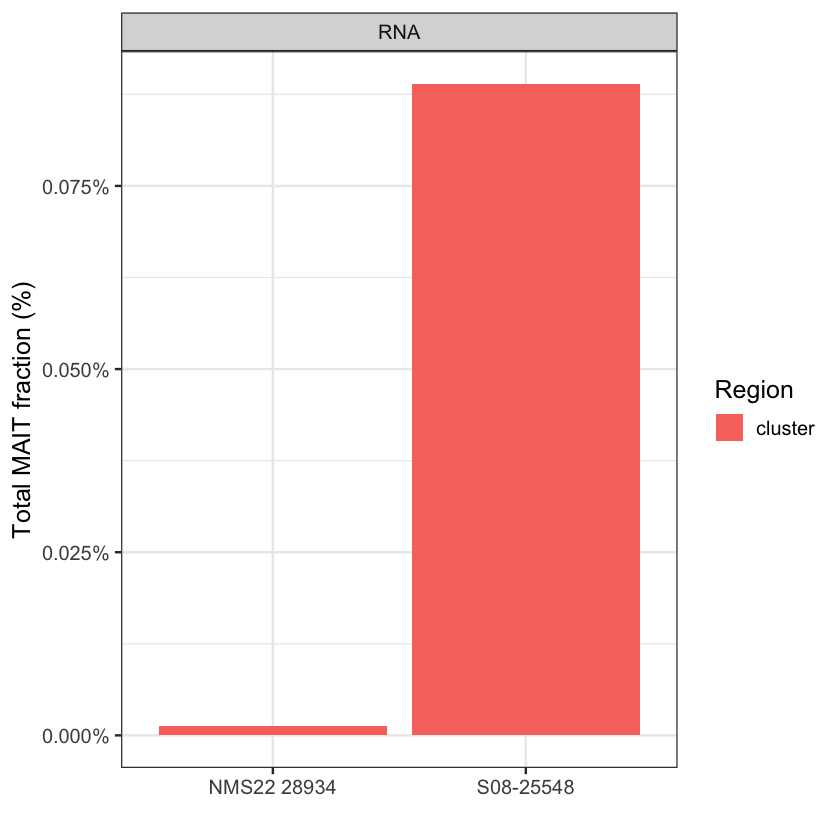

In [20]:
punch_trb_combined_tbl %>%
    group_by(`tumor_name`, `sample_material`, `punch_region`, `is_MAIT`) %>%
    summarize(`total_frac`=sum(`readFraction`), .groups='drop') %>%
    filter(`is_MAIT`) %>%
    ggplot(aes(x=`tumor_name`, y=`total_frac`, fill=`punch_region`)) +
        geom_col(position='dodge') +
        facet_wrap(~`sample_material`, ncol=1, scales='free_y') +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Total MAIT fraction (%)',
            fill='Region'
        ) +
        scale_y_continuous(labels=scales::percent)
